# PREGUNTAS
- ¿Está el modelo sobreentrenado?
- ¿Qué modelo es mejor?

## Martes

In [4]:
# A^-1 no es la inversa, utilizar inv()
# Ruta de csv: ../CSV/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

x = np.array([0.0115, 0.012, 0.012, 0.012, 0.013, 0.0135, 0.026, 0.032, 0.034, 0.038, 0.04, 0.041, 0.084, 0.086, 0.092, 0.098])
y = np.array([50.5, 49, 50.2, 44.5, 48.5, 47.5, 35, 34.5, 38, 31.5, 28, 38.5, 15, 29.5, 20.5, 17])

y_e = np.array([50.5, 50.2, 48.5, 35, 38, 28, 15, 20.5])
y_t = np.array([49, 44.5, 47.5, 34.5, 31.5, 38.5, 29.5, 17])

x_e = np.array([0.0115, 0.012, 0.013, 0.026, 0.034, 0.04, 0.084, 0.092])
x_t = np.array([0.012, 0.012, 0.0135, 0.032, 0.038, 0.041, 0.086, 0.098])

# Create a column of ones with the same length as x_E
ones = np.ones_like(x_e)

[[0.0115 1.    ]
 [0.012  1.    ]
 [0.013  1.    ]
 [0.026  1.    ]
 [0.034  1.    ]
 [0.04   1.    ]
 [0.084  1.    ]
 [0.092  1.    ]]

[-400.33639449   51.35064041]


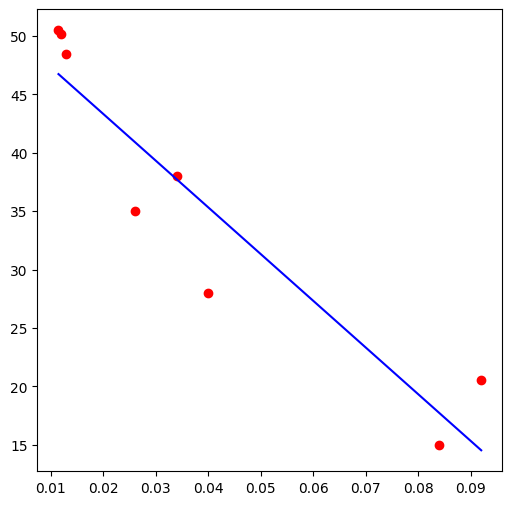

Error cuadrático de entrenamiento: 165.35793634581705
Error cuadrático medio (%) de entrenamiento: 20.66974204322713
Error cuadrático de validación: 245.19919326758145
Error cuadrático medio (%) de validación: 30.64989915844768
Diferencia relativa (dividir): 0.45479115888762883
Percentil: 30.80510065550509


In [5]:
# Stack as two columns: [x_E | 1]
A = np.column_stack((x_e, ones))

# Modelo 1 (y = ax + b)
print(A, end='\n\n')

resultado = np.linalg.inv(A.T @ A) @ A.T @ y_e
print(resultado)

# Coeficientes de la recta utilizando el resultado dado
a, b = resultado
# Generar la línea (puedes usar un rango más fino para que se vea continua)
x_line = np.linspace(np.min(x_e), np.max(x_e), 1000)
y_line = a * x_line + b

plt.figure(figsize=(6,6))
plt.plot(x_e, y_e, 'or', x_line, y_line, '-b')
plt.show()

y_ep = a * x_e + b
error_e = (y_e - y_ep) @ (y_e - y_ep).T 
print('Error cuadrático de entrenamiento:', error_e)
print('Error cuadrático medio (%) de entrenamiento:', error_e / 8)
y_tp = a * x_t + b
error_t = (y_t - y_tp) @ (y_t - y_tp).T 
print('Error cuadrático de validación:', error_t)
print('Error cuadrático medio (%) de validación:', error_t / 8)
print('Diferencia relativa (dividir):', error_e**2 / error_t**2)
print('Percentil:', scipy.stats.f.cdf(error_e / error_t, 7, 7) * 100)

[[1.3225e-04 1.0000e+00]
 [1.4400e-04 1.0000e+00]
 [1.6900e-04 1.0000e+00]
 [6.7600e-04 1.0000e+00]
 [1.1560e-03 1.0000e+00]
 [1.6000e-03 1.0000e+00]
 [7.0560e-03 1.0000e+00]
 [8.4640e-03 1.0000e+00]]

[-3538.42332109    44.29196022]


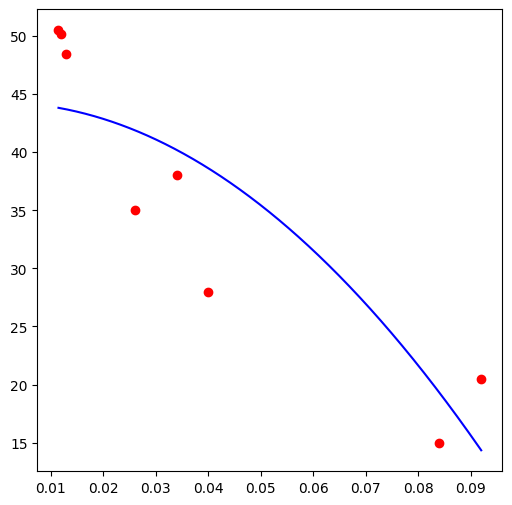

Error cuadrático de entrenamiento: 330.93196047937516
Error cuadrático medio (%) de entrenamiento: 41.366495059921895
Error cuadrático de validación: 313.9136932807565
Error cuadrático medio (%) de validación: 39.23921166009456
Diferencia relativa (dividir): 1.11136548020256
Percentil: 52.68662840391731


In [6]:
# Modelo 2 (y = ax^2 + b)
A = np.column_stack((x_e**2, ones))

print(A, end='\n\n')

resultado = np.linalg.inv(A.T @ A) @ A.T @ y_e
print(resultado)

# Coeficientes de la recta utilizando el resultado dado
a, b = resultado
# Generar la línea (puedes usar un rango más fino para que se vea continua)
x_line = np.linspace(np.min(x_e), np.max(x_e), 1000)
y_line = a * x_line**2 + b

plt.figure(figsize=(6,6))
plt.plot(x_e, y_e, 'or', x_line, y_line, '-b')
plt.show()

y_ep = a * x_e**2 + b
error_e = (y_e - y_ep) @ (y_e - y_ep).T 
print('Error cuadrático de entrenamiento:', error_e)
print('Error cuadrático medio (%) de entrenamiento:', error_e / 8)
y_tp = a * x_t**2 + b
error_t = (y_t - y_tp) @ (y_t - y_tp).T 
print('Error cuadrático de validación:', error_t)
print('Error cuadrático medio (%) de validación:', error_t / 8)
print('Diferencia relativa (dividir):', error_e**2 / error_t**2)
print('Percentil:', scipy.stats.f.cdf(error_e / error_t, 7, 7) * 100)

[[1.3225e-04 1.1500e-02 1.0000e+00]
 [1.4400e-04 1.2000e-02 1.0000e+00]
 [1.6900e-04 1.3000e-02 1.0000e+00]
 [6.7600e-04 2.6000e-02 1.0000e+00]
 [1.1560e-03 3.4000e-02 1.0000e+00]
 [1.6000e-03 4.0000e-02 1.0000e+00]
 [7.0560e-03 8.4000e-02 1.0000e+00]
 [8.4640e-03 9.2000e-02 1.0000e+00]]

[ 6548.16382978 -1074.26930232    61.79909827]


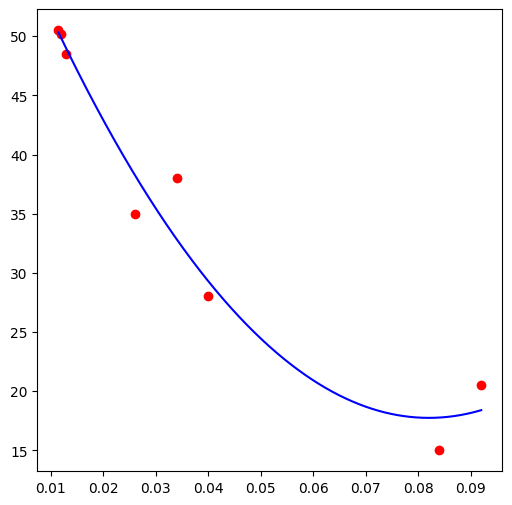

Error cuadrático de entrenamiento: 51.59217211793228
Error cuadrático medio (%) de entrenamiento: 6.449021514741535
Error cuadrático de validación: 268.1609171226087
Error cuadrático medio (%) de validación: 33.520114640326085
Diferencia relativa (dividir): 0.03701490687310082
Percentil: 2.252085691352865


In [7]:
# Modelo 3 (y = ax^2 + bx +c)
A = np.column_stack((x_e**2, x_e, ones))

print(A, end='\n\n')

resultado = np.linalg.inv(A.T @ A) @ A.T @ y_e
print(resultado)

# Coeficientes de la recta utilizando el resultado dado
a, b, c = resultado
# Generar la línea (puedes usar un rango más fino para que se vea continua)
x_line = np.linspace(np.min(x_e), np.max(x_e), 1000)
y_line = a * x_line**2 + b * x_line + c

plt.figure(figsize=(6,6))
plt.plot(x_e, y_e, 'or', x_line, y_line, '-b')
plt.show()

y_ep = a * x_e**2 + b * x_e + c
error_e = (y_e - y_ep) @ (y_e - y_ep).T 
print('Error cuadrático de entrenamiento:', error_e)
print('Error cuadrático medio (%) de entrenamiento:', error_e / 8)
y_tp = a * x_t**2 + b * x_t + c
error_t = (y_t - y_tp) @ (y_t - y_tp).T 
print('Error cuadrático de validación:', error_t)
print('Error cuadrático medio (%) de validación:', error_t / 8)
print('Diferencia relativa (dividir):', error_e**2 / error_t**2)
print('Percentil:', scipy.stats.f.cdf(error_e / error_t, 7, 7) * 100)

[[1.520875e-06 1.322500e-04 1.150000e-02 1.000000e+00]
 [1.728000e-06 1.440000e-04 1.200000e-02 1.000000e+00]
 [2.197000e-06 1.690000e-04 1.300000e-02 1.000000e+00]
 [1.757600e-05 6.760000e-04 2.600000e-02 1.000000e+00]
 [3.930400e-05 1.156000e-03 3.400000e-02 1.000000e+00]
 [6.400000e-05 1.600000e-03 4.000000e-02 1.000000e+00]
 [5.927040e-04 7.056000e-03 8.400000e-02 1.000000e+00]
 [7.786880e-04 8.464000e-03 9.200000e-02 1.000000e+00]]

[ 1.16002032e+05 -9.68262312e+03 -4.90255121e+02  5.66228337e+01]


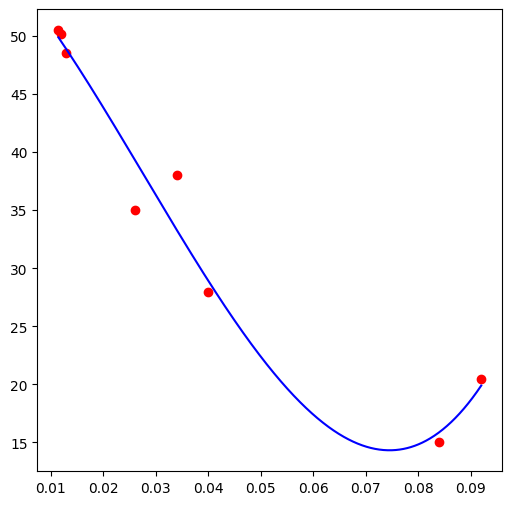

Error cuadrático de entrenamiento: 43.9637970629525
Error cuadrático medio (%) de entrenamiento: 5.495474632869063
Error cuadrático de validación: 359.3227662983854
Error cuadrático medio (%) de validación: 44.91534578729817
Diferencia relativa (dividir): 0.014969969654445945
Percentil: 0.6389470704319283


In [8]:
# Modelo 4 (y = ax^3 + bx^2 +cx + d)
A = np.column_stack((x_e**3, x_e**2, x_e, ones))

print(A, end='\n\n')

resultado = np.linalg.inv(A.T @ A) @ A.T @ y_e
print(resultado)

# Coeficientes de la recta utilizando el resultado dado
a, b, c, d = resultado
# Generar la línea (puedes usar un rango más fino para que se vea continua)
x_line = np.linspace(np.min(x_e), np.max(x_e), 1000)
y_line = a * x_line**3 + b * x_line**2 + c *x_line + d

plt.figure(figsize=(6,6))
plt.plot(x_e, y_e, 'or', x_line, y_line, '-b')
plt.show()

y_ep = a * x_e**3 + b * x_e**2 + c * x_e + d
error_e = (y_e - y_ep) @ (y_e - y_ep).T 
print('Error cuadrático de entrenamiento:', error_e)
print('Error cuadrático medio (%) de entrenamiento:', error_e / 8)
y_tp = a * x_t**3 + b * x_t **2 + c * x_t + d
error_t = (y_t - y_tp) @ (y_t - y_tp).T 
print('Error cuadrático de validación:', error_t)
print('Error cuadrático medio (%) de validación:', error_t / 8)
print('Diferencia relativa (dividir):', error_e**2 / error_t**2)
print('Percentil:', scipy.stats.f.cdf(error_e / error_t, 7, 7) * 100)

[[1.74900625e-08 1.52087500e-06 1.32250000e-04 1.15000000e-02
  1.00000000e+00]
 [2.07360000e-08 1.72800000e-06 1.44000000e-04 1.20000000e-02
  1.00000000e+00]
 [2.85610000e-08 2.19700000e-06 1.69000000e-04 1.30000000e-02
  1.00000000e+00]
 [4.56976000e-07 1.75760000e-05 6.76000000e-04 2.60000000e-02
  1.00000000e+00]
 [1.33633600e-06 3.93040000e-05 1.15600000e-03 3.40000000e-02
  1.00000000e+00]
 [2.56000000e-06 6.40000000e-05 1.60000000e-03 4.00000000e-02
  1.00000000e+00]
 [4.97871360e-05 5.92704000e-04 7.05600000e-03 8.40000000e-02
  1.00000000e+00]
 [7.16392960e-05 7.78688000e-04 8.46400000e-03 9.20000000e-02
  1.00000000e+00]]

[ 5.76222094e+06 -1.10894530e+06  7.66810681e+04 -2.72866009e+03
  7.33420142e+01]


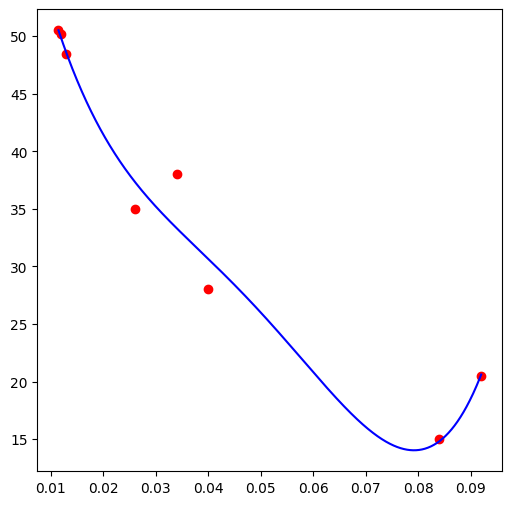

Error cuadrático de entrenamiento: 34.776898240419264
Error cuadrático medio (%) de entrenamiento: 4.347112280052408
Error cuadrático de validación: 462.2630107003863
Error cuadrático medio (%) de validación: 57.78287633754829
Diferencia relativa (dividir): 0.0752318429885357
Percentil: 0.14677332925973594


In [48]:
# Modelo 5 (y = ax^4 + bx^3 +cx^2 + dx + e)
A = np.column_stack((x_e**4, x_e**3, x_e**2, x_e, ones))

print(A, end='\n\n')

resultado = np.linalg.inv(A.T @ A) @ A.T @ y_e
print(resultado)

# Coeficientes de la recta utilizando el resultado dado
a, b, c, d, e = resultado
# Generar la línea (puedes usar un rango más fino para que se vea continua)
x_line = np.linspace(np.min(x_e), np.max(x_e), 1000)
y_line = a * x_line**4 + b * x_line**3 + c * x_line**2 + d * x_line + e

plt.figure(figsize=(6,6))
plt.plot(x_e, y_e, 'or', x_line, y_line, '-b')
plt.show()

y_ep = a * x_e**4 + b * x_e**3 + c * x_e**2 + d * x_e + e
error_e = (y_e - y_ep) @ (y_e - y_ep).T 
print('Error cuadrático de entrenamiento:', error_e)
print('Error cuadrático medio (%) de entrenamiento:', error_e / 8)
y_tp = a * x_t**4 + b * x_t **3 + c * x_t**2 + d * x_t + e
error_t = (y_t - y_tp) @ (y_t - y_tp).T 
print('Error cuadrático de validación:', error_t)
print('Error cuadrático medio (%) de validación:', error_t / 8)
print('Diferencia relativa (dividir):', error_e / error_t)
print('Percentil:', scipy.stats.f.cdf(error_e / error_t, 7, 7) * 100)

## Miércoles

In [53]:
# A^-1 no es la inversa, utilizar inv()
# Ruta de csv: ../CSV/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

df = pd.read_csv('../CSV/data_temperature_pressure_humidity.csv', decimal=',', sep=';')
display(df.head(df.size))

t = np.array(df.Temperature.values)
h = np.array(df.Humidity.values)     # Normalizar
p = np.array(df.Pressure.values)     # Normalizar

h_norm = (h - h.mean()) / h.std()    # Normalizados
p_norm = (p - p.mean()) / p.std()    # Normalizados

A = np.stack((h_norm, p_norm, t), axis=1)         # Creación de matrices
print(A)

# Barajar los índices de las filas
indices = np.random.permutation(A.shape[0])
# Mitad del tamaño
mitad = A.shape[0] // 2
# Primera mitad (bloque 1) y segunda mitad (bloque 2)
A_e = A[indices[:mitad]]
A_t = A[indices[mitad:]]

print("\nBloque entrenamiento (A_e):\n", A_e)
print("\nBloque test (A_t):\n", A_t)

h_e = A_e[:, 0]
h_t = A_t[:, 0]
p_e = A_e[:, 1]
p_t = A_t[:, 1]
t_e = A_e[:, 2]
t_t = A_t[:, 2]
ones = np.ones_like(h_e)

,Humidity,Pressure,Temperature
0,0.006993,1018.41577,8.393457
1,0.006736,1019.81128,8.620356
2,0.006697,1021.31366,9.361292
3,0.006370,1022.71802,10.435968
4,0.006117,1023.69019,11.233515
...,...,...,...
1111,0.005167,1010.14575,14.628382
1112,0.005631,1010.70276,13.815973
1113,0.006095,1011.71454,13.298029
1114,0.006099,1012.48877,12.857996


[[-1.10649869  0.75121222  8.39345741]
 [-1.22462443  0.94438465  8.62035561]
 [-1.24224913  1.15235048  9.36129189]
 ...
 [-1.51902468 -0.17640053 13.2980289 ]
 [-1.51696459 -0.06922832 12.857996  ]
 [-1.51257437  0.03812107 12.5229435 ]]

Bloque entrenamiento (A_e):
 [[ 0.6038146  -1.23606725 24.0458317 ]
 [-0.13861591  0.9811529  15.0694218 ]
 [ 0.77235342 -1.28167389 16.9375858 ]
 ...
 [ 0.4348317   0.14787905 18.2302494 ]
 [ 0.15587022 -0.42287598 18.3265018 ]
 [ 0.68620049  0.33796738 21.9843998 ]]

Bloque test (A_t):
 [[-0.4752031   1.1294122  13.4378605 ]
 [-0.78281442  0.42206565 13.7390385 ]
 [ 0.84597312 -0.54907461 17.8938541 ]
 ...
 [-1.36054754 -0.79754475 16.3487186 ]
 [-0.54668464 -0.79162989 14.4113407 ]
 [-0.81726934  0.13796925 24.6636906 ]]


[[ 0.6038146  -1.23606725  1.        ]
 [-0.13861591  0.9811529   1.        ]
 [ 0.77235342 -1.28167389  1.        ]
 ...
 [ 0.4348317   0.14787905  1.        ]
 [ 0.15587022 -0.42287598  1.        ]
 [ 0.68620049  0.33796738  1.        ]]

[ 1.9178055  -0.0292047  17.58686986]


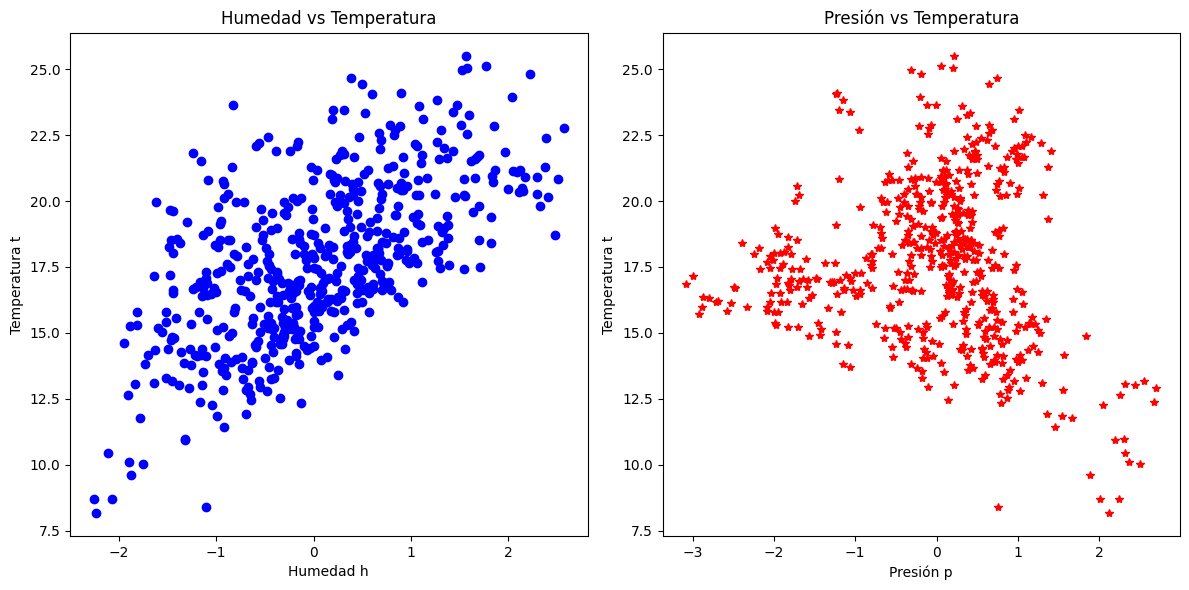

1.9178055017442444 -0.029204702359592744 17.58686986064759

Error cuadrático de entrenamiento: 3105.56778263262
Error cuadrático medio (%) de entrenamiento: 5.565533660631935

Error cuadrático de validación: 7657.42815871459
Error cuadrático medio (%) de validación: 13.722989531746576

Diferencia relativa (dividir): 0.4055627709805291
Percentil: 12.83714156503121


In [80]:
# Modelo 5 (y = ax^4 + bx^3 +cx^2 + dx + e)
A = np.column_stack((h_e, p_e, ones))

print(A, end='\n\n')

resultado = np.linalg.inv(A.T @ A) @ A.T @ t_e
print(resultado)

# Coeficientes de la recta utilizando el resultado dado
a, b, c = resultado
# Generar la línea (puedes usar un rango más fino para que se vea continua)
x_line = np.linspace(np.min([np.min(h_e), np.min(p_e)]), np.max([np.max(h_e), np.max(p_e)]), 1000)
y_line = a * h_e + b * p_e + c

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: Humedad vs Temperatura
ax1.set(xlabel="Humedad h", ylabel="Temperatura t", title="Humedad vs Temperatura")
ax1.plot(h_e, t_e, 'ob')
# Gráfico 2: Presión vs Temperatura
ax2.set(xlabel="Presión p", ylabel="Temperatura t", title="Presión vs Temperatura")
ax2.plot(p_e, t_e, '*r')

plt.tight_layout()
plt.show()

print(a, b, c, end='\n\n')

t_ep = a * h_e + b * p_e + c
error_e = (t_e - t_ep) @ (t_e - t_ep).T 
print('Error cuadrático de entrenamiento:', error_e)
print('Error cuadrático medio (%) de entrenamiento:', error_e / len(ones), end='\n\n')

t_tp = a * h_e + b * p_e + c
error_t = (t_t - t_tp) @ (t_t - t_tp).T 
print('Error cuadrático de validación:', error_t)
print('Error cuadrático medio (%) de validación:', error_t / len(ones), end='\n\n')

print('Diferencia relativa (dividir):', error_e / error_t)
print('Percentil:', scipy.stats.f.cdf(error_e / error_t, 7, 7) * 100)